### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### 2. Environment creation

#### Parameters for Simulation

In [3]:
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 40
max_inventory_amount_central_warehouse = 60
customer_demand_per_step = [1,2,3]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 8
with_manufacturer = False
cw_shipment_amount = 10
manufacturer_prod_capacity_per_step = 10

#### Parameters for Agent Training

In [4]:
training_steps = 150000

print("-> Equals to " + str(int(training_steps/simulation_length)) + " simulation training rounds")

-> Equals to 5000 simulation training rounds


#### Creating Environment

In [5]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step
                 )

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 20
regional_warehouse_1 ; ID: 1 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 13 ; Demand: 2 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 13 ; Demand: 3 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(rw_inventories:MultiDiscrete([41 41 41]), shipments:MultiDiscrete([2 2 2]))
Action space: MultiDiscrete([2 2 2])
Starting state: {'rw_inventories': array([13, 13, 13]), 'shipments': array([0, 0, 0])}
________________________________________________________________________________


### 3. RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [6]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=training_steps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 1.34     |
| time/              |          |
|    fps             | 767      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 1.38        |
| time/                   |             |
|    fps                  | 560         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009469046 |
|    clip_fraction        | 0.056       |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 2.87        |
| time/                   |             |
|    fps                  | 398         |
|    iterations           | 11          |
|    time_elapsed         | 56          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.015500105 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.543       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0956      |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0304     |
|    value_loss           | 0.239       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 5.42        |
| time/                   |             |
|    fps                  | 347         |
|    iterations           | 21          |
|    time_elapsed         | 123         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.009085268 |
|    clip_fraction        | 0.095       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.822      |
|    explained_variance   | 0.314       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.454       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 1.1         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 6.86        |
| time/                   |             |
|    fps                  | 330         |
|    iterations           | 31          |
|    time_elapsed         | 192         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.006479983 |
|    clip_fraction        | 0.0702      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.493      |
|    explained_variance   | 0.2         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.908       |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00809    |
|    value_loss           | 2.19        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.96         |
| time/                   |              |
|    fps                  | 353          |
|    iterations           | 41           |
|    time_elapsed         | 237          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0061624567 |
|    clip_fraction        | 0.0604       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.268        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.05         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00662     |
|    value_loss           | 2.15         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.74        |
| time/                   |             |
|    fps                  | 363         |
|    iterations           | 51          |
|    time_elapsed         | 287         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.004757458 |
|    clip_fraction        | 0.045       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.285      |
|    explained_variance   | 0.288       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.31        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00401    |
|    value_loss           | 2.45        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 8.04         |
| time/                   |              |
|    fps                  | 366          |
|    iterations           | 61           |
|    time_elapsed         | 341          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0046600653 |
|    clip_fraction        | 0.0429       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.199       |
|    explained_variance   | 0.384        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.07         |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00514     |
|    value_loss           | 2.27         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.8         |
| time/                   |             |
|    fps                  | 369         |
|    iterations           | 71          |
|    time_elapsed         | 393         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.004107246 |
|    clip_fraction        | 0.0405      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.21       |
|    explained_variance   | 0.256       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.18        |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.00396    |
|    value_loss           | 2.59        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

###### Learning Curve

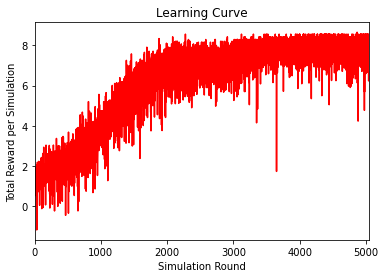

[0, 1.491050200030753, 1.0975523114306018, 1.144133198016112, 1.8301567870332136, 1.5555056663865923, 1.7641219367346772, 1.360160620002532, 1.5930141478522335, 1.1691477964697778, 1.3567190255852821, 0.5262477582359475, 1.486044853504779, 1.2503908198350087, 1.2698916001476426, 1.3059120271878706, 0.5967868319605141, 1.500703848381782, 1.5534112045485964, 1.1906857786052245, 1.346521567101353, 1.332586826994552, 1.6129368646927402, 1.2121333450932494, 1.9551247240451606, 1.158866653898748, 1.549501309021478, 1.5546466587433998, 1.4236650418629015, 1.27498085501417, 1.1477238726404784, 0.6423286551447027, 1.204255928601819, -1.1857667511721621, 1.3597929953481782, 1.0996746087979274, 1.3761141507918109, 1.211842835689118, 1.1176824956903972, 1.1840844687550542, 1.4239408708635803, 2.068371976738384, 1.5329134964979114, 2.184653319077275, 1.5244790630284073, 0.8119704902167035, 1.3125292987274317, 1.3874017962650909, 1.1884293560757488, 1.5921237893876092, 1.672230933028147, 1.394603744

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(env.total_reward, color="red")
plt.title("Learning Curve")
plt.xlim(0, len(env.total_reward))
plt.ylabel("Total Reward per Simulation")
plt.xlabel("Simulation Round")
plt.show()
print(env.total_reward)

### 4. Run simulation

In [11]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []

actions = {}
for rw_id in env.simulation.get_regional_warehouses():
    actions[rw_id] = []
    
cw_inventory_level = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1
    
    i = 1
    for inv in info["Action:"]:
        actions[i].append(inv)
        i += 1
    
    try:
        cw_inventory_level.append(info["CW Inv:"])
    except:
        pass
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | RW Invs: [12, 11, 10] | Shipments [0, 0, 0] | Action: [0 0 0] | Reward: 0.08 | 
Steps left: 28 | RW Invs: [11, 9, 7] | Shipments [0, 0, 0] | Action: [0 0 0] | Reward: 0.1 | 
Steps left: 27 | RW Invs: [10, 7, 4] | Shipments [0, 0, 1] | Action: [0 0 1] | Reward: 0.14 | 
Steps left: 26 | RW Invs: [9, 5, 1] | Shipments [0, 0, 1] | Action: [0 0 0] | Reward: 0.26 | 
Steps left: 25 | RW Invs: [8, 3, 6] | Shipments [0, 1, 0] | Action: [0 1 0] | Reward: 0.17 | 
Steps left: 24 | RW Invs: [7, 1, 3] | Shipments [0, 1, 1] | Action: [0 0 1] | Reward: 0.29 | 
Steps left: 23 | RW Invs: [6, 7, 0] | Shipments [0, 0, 1] | Action: [0 0 0] | Reward: 0.42 | 
Steps left: 22 | RW Invs: [5, 5, 5] | Shipments [0, 0, 1] | Action: [0 0 1] | Reward: 0.17 | 
Steps left: 21 | RW Invs: [4, 3, 2] | Shipments [0, 1, 1] | Action: [0 1 0] | Reward: 0.26 | 
Steps left: 20 | RW Invs: [3, 1, 7] | Shipments [0, 1, 0] | Action: [0 0 0] | Reward: 0.29 | 
Steps left: 19 | RW Invs: [2, 7, 4] | Shipments [0, 0, 1

###### Inventory level graphs

RW 1
[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 7, 6, 5, 4, 3, 2, 1, 0, 7, 6, 13, 12, 11, 10, 9, 8, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
____________________________________________________________________________________________________
RW 2
[11, 9, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 1, 7, 5, 3, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
____________________________________________________________________________________________________
RW 3
[10, 7, 4, 1, 6, 3, 0, 5, 2, 7, 4, 1, 6, 3, 0, 5, 2, 7, 4, 1, 6, 3, 0, 5, 2, 7, 4, 1, 6, 3]
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
____________________________________________________________________________________________________


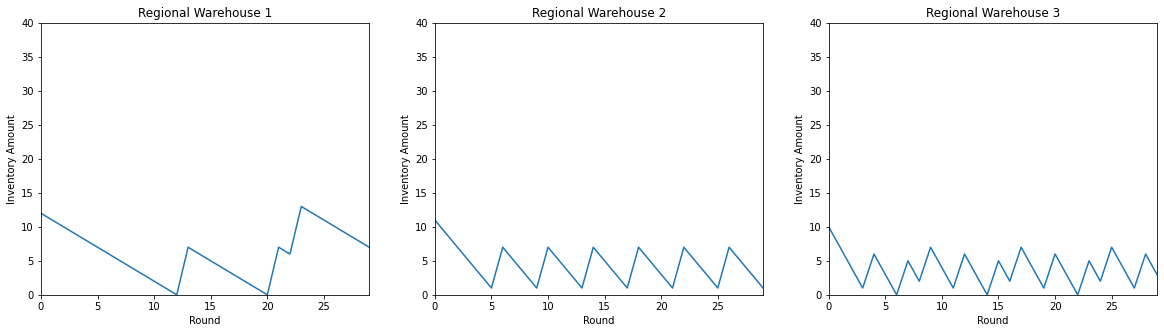

In [12]:
# Plot inventories of regional warehouses

plt.rcParams["figure.figsize"] = (20, 5)

for rw_id in inventory_levels:
    plt.subplot(1, number_of_regional_warehouses, rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.title("Regional Warehouse " + str(rw_id))
    plt.ylim(0, max_inventory_amount_regional_warehouses)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    
    print("RW", rw_id)
    print(inventory_levels[rw_id])
    print(actions[rw_id])
    print("_"*100)

plt.show()

In [10]:
# Plot central warehouse inventory (Only display if simulated by adding a manufacturer)
if len(cw_inventory_level) != 0:
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.plot(cw_inventory_level, color="green")
    plt.title("Central Warehouse")
    plt.ylim(0, max_inventory_amount_central_warehouse)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    plt.show()